<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/KnapsackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de optimizacion**
**Entrada**: Un valor W que representa la cantidad maxima de la mochila, dos arreglos, uno de valores de largo n $val = [a_1,a_2,...,a_n]$ y otro arreglo con el peso de n objetos $w = [w_1,w_2,...,w_n]$.

**Salida**: Un conjunto de objetos que maximizan el valor total.

KnapsackProblem/El problema de la mochila es un problema de optimizacion combinatoria esto quiere decir que busca la mejor solucion dentro de una cantidad de soluciones por medio de un problema donde debemos llenar una mochila incapaz de soportar mas del el peso declarado/permitido donde cada objeto tiene un valor y peso especifico.Dichos objetos deben optimizar el valor total sin que este exceda antes el peso permitido.

Este problema de optimizacion sera resuelto mediante programacion dinamica (bottom-up) y el algoritmo greddy/voraz.



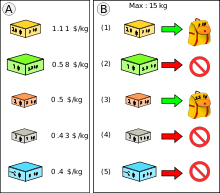

# 2. Descripcion del algoritmo

KnapsackProblem con programacion dinamica, es un metodo que sirve para reducir el tiempo de ejecucion de un algoritmo mediante el uso de subproblemas y subestructuras optimas. Este algoritmo es correcto de usar en este tipo de problema debido a que siempre resuelve los subproblemas pensando en obtener una solucion global/general del problema.

Para resolver este problema con programacion dinamica debe de seguir los siguiente pasos:

1. Primeramente debemos de crear una matriz $a$ la cual en su interior contendra en su totalidad valores "0".

2. Despues debemos hacer un recorrido en el primer ciclo de las filas y en el segundo de columnas.

3. Finalmente aplicamos la subestructura optima para encontrar un valor. Esto quiere decir que la subestructura nos ayuda a encontrar el valor maximo para cada una de los subproblemas posibles considerando la totalidad de elementos que podrian o no superar la capacidad maxima de la mochila.


KnapsackProblem con estrategia greddy/voraz es una estrategia de busqueda la cual consiste en elegir la opcion mas optima en cada paso local con la suerte de encontrar una solucion optima global. Esta estrategia resuelve de manera ineficiente el problema antes mencionado, debido a que como nombramos antes se enfoca en el subproblema actual y la mejor solucion para este, no teniendo en cuenta la busqueda para una solucion optima global dando asi una opcion aleatoria de encontrarla, habiendo casos donde directamente no es encontrada. 

Para resolver este problema con estrategia greddy/voraz debe de seguir los siguiente pasos:

1. Primeramente debemos de crear una variable $"a"$ que almacene un arreglo con los indices de todos los objetos.

2. Despues debemos de calcular el valor por kilo de cada item/objeto y guardarlo en un nuevo arreglo, para despues ordenar los indices dependiendo del el valor por kilo de menor a mayor.

3. Finalmente recorremos los indices de cada item/objeto y lo agregamos a la mochila.


# 2.2. Algoritmos para KnapsackProblem

A continuacion se mostrara la optimizacion de el problema KnapsackProblem tanto con progrmacion dinamica como con el uso de el algoritmo Greddy/Voraz.

In [21]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout


In [22]:
#Programacion Dinamica

def knapSack(W, wt, val, n):
    K = [[0 for x in range(W + 1)] for x in range(n + 1)]
 
    # Build table K[][] in bottom up manner
    for i in range(n + 1):
        for w in range(W + 1):
            if i == 0 or w == 0:
                K[i][w] = 0
            elif wt[i-1] <= w:
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])
            else:
                K[i][w] = K[i-1][w]
 
    return K[n][W]

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print(knapSack(W, wt, val, n))


220


In [27]:
#Estrategia Greddy/Voraz

def knapSackGreddy(W, wt, val, n):
  K = [0 for x in range(n)]
  l = [x for x in range(n)]
  
  for i in range(0, n):
    K[i] = val[i]/wt[i]

  for i in range (n):
    mayor = 0
    for j in range(i, n):
      if K[j] > mayor:
        mayor = K[j]
        K[j], K[i] = K[i], K[j]
        l[j], l[i] = l[i], l[j]

  maximo = 0
  for i in l:
    if wt[i] <= W:
      maximo += val[i]
      W -= wt[i]

  return maximo

val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print(knapSackGreddy(W, wt, val, n))

160


input array: [3, 1, 5, 6, 2]

Pasada
[1]
1 , 1 , 
[1, 3]
[2]
2 , 2 , 
[2, 6]
[2]
2 , 2 , 
[2, 5]
[2, 5, 6]
[1]
[1, 2]
1 , 1 , 2
[1, 2, 3]
[1, 2, 3, 5]
[1, 2, 3, 5, 6]
[1, 2, 3, 5, 6]


# 2.3. Ejemplo
Ejemplo de un arreglo y las comparaciones que hace.

In [ ]:
arreglo = [3,1,5,6,2]
arreglo = MergeSort(arreglo)

print(arreglo)

1 , 1 , 
3 , 3 , 
2 , 2 , 
6 , 6 , 
2 , 2 , 6
5 , 5 , 
2 , 2 , 5, 6
3 , 3 , 
[1, 2, 3, 5, 6]


# 2.4. Ejecucion del algoritmo paso a paso (verbose=True)
Debido a esta opcion podemos ver el funcionamiento paso a paso en cada iteracion.

En cada iteracion se recorre:

*   Elemento de la lista
*   Elemento de la lista

Color amarillo: Numero actual que se esta comparando.

Color verde: Numeros que se estan realizando un cambio.

# 3. Tiempo de ejecucion






## **Teorema (Tiempo de ejecucion).**
### **Programacion Dinamica**
**Tiempo de ejecucion : O(n * w)**

### **Prueba del teorema**

Siendo n cantidad de objetos de entrada y w la capacidad de peso maximo que puede almacenar

1. Crear matriz de $n + 1$ filas y $W + 1$ columnas equivale a tener una complejidad de **$O(n * W)$**.

2. Ciclo iterativo hasta **$n$** veces lo que equivale a una complejidad de $O(n)$.

3. Ciclo iterativo hasta **$W$** veces lo que equivale a una complejidad de $O(W)$.

$O(n) = 2 * O(n * W) + O(n) + 2 *O (1)$

$O(n * W)$

### **Estrategia Greddy**
**Tiempo de ejecucion : O(n * log(n)**

### **Prueba del teorema**

Siendo n la cantidad de objetos de entrada:

1. Ciclos anidados iterativos hasta $n$ veces, uno de esos ciclos tiene complejidad $O(n)$ debido a que itera en todo su largo y el segundo ciclo anidado tiene complejidad $O(log(n))$ debido a que este recorre la mitad de su totalidad, dandonos asi una complejidad de $O(n * log(n))$.

2. Ciclo iterativo hasta $n$ veces lo que equivale a una complejidad de $O(n)$.

$O(n * log(n))$

# 4. Correctitud



## **Teorema (Correctitud).**

El algoritmo genera un conjunto de objetos donde dichos objetos parten del conjunto original, que representa el maximo valor resultante que puede alcanzar el problema.

### Prueba del Teorema

**Inicializacion**

Antes de la primera iteracion inicializamos una matriz $K$ con 0 en todos sus espacios. Esto quiere decir que al ingresar en la posicion $K[i][w]$ siendo w es el peso del objeto, tendra como valor la maxima ganancia encontrada por lo que cumple la propiedad.

**Mantencion**

Al comienzo de cada i-esima iteracion el elemento $K(i,w)$ , siempre almacenara la cantidad maxima de ganancia posible para el subproblema resuleto en ese momento. 

Durante esta i-esima iteracion tenemos dos casos posibles:

1. Si $wt[i - 1] <= w$ siendo "$wt$" el arreglo de pesos, $K[i][w]$ contendra en su interior el maximo resultado entre $val[i - 1] + K[i - 1][w -wt[i - 1]]$ siendo val el arreglo de valores.

2. Caso contrario donde $wt[i - 1] > w$, $K[i][w]$ contendra en su interior el maximo resultado, esto quiere decir $K[i - 1][w]$.

Dado que en cada caso la posicion anteriormente vista almacena siempre la maxima ganancia hemos  comprobado que la propiedad es verdadera.

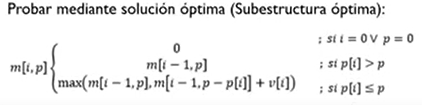

## **Teorema (Correctitud).**

###**Por qué el algoritmo greedy no retorna el resultado optimo**

El algoritmo Greddy/Voraz tal como hablamos al comienzo del informe funciona por medio de considerar resultados locales como globales es decir como un resultado optimo, es por ello la dificultad que tiene este de encontrar la mejor optimizacion, viendolo desde el problema de la mochila este algoritmo agrega a la ganancia los objetos que tengan una mejor proporcion valor/peso. Sin embargo si durante las iteraciones se encuentra un objeto que sobrepasa la capacidad deja este de ser evaluado dentro del conjunto de optimizaciones, saltandose posibles objetos que si podian de ser agregados.



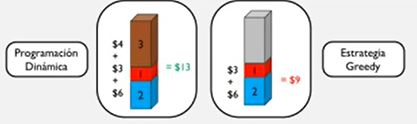

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo ordenado de $0$ hasta $n-1$.
*   Peor caso: La secuencia será un arreglo ordenado de $n-1$ hasta $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

Como ejemplo del mejor y peor caso, se pueden observar las demostraciones anteriores, donde $n$ es reemplazado por 5.

### Análisis de resultados

#5.2. Tiempo de ejecucion (experimental)

**Analisis de resultados**